In [92]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [93]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [94]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [95]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [96]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [97]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [98]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [99]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [100]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

In [103]:
# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date,
        Measurement.prcp]
year_precipitation = session.query(*sel).\
    filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.date >= '2016-08-23')

In [110]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_precipitation = pd.DataFrame(year_precipitation)
df_precipitation.set_index("date", inplace=True)
df_precipitation

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [ ]:
# Sort the dataframe by date
df_precipitation.sort_values(by="date")
#df_precipitation.head(25)

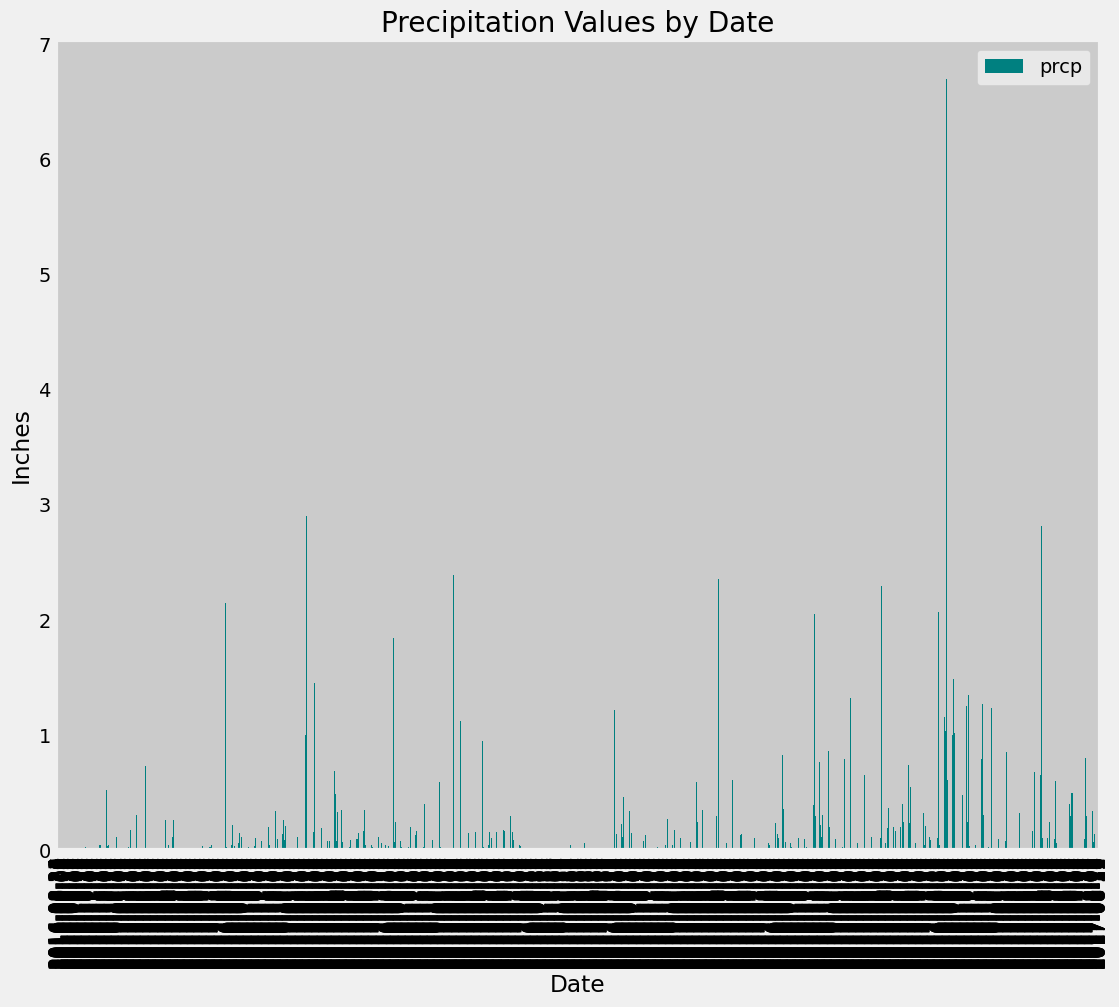

In [101]:
# Use Pandas Plotting with Matplotlib to plot the data
df_precipitation.plot(kind="bar", facecolor="teal", figsize=(12,10),
                            title="Precipitation Values by Date",
                            xlabel="Date",
                            ylabel="Inches",
                            legend="Precipitation"
                            #plt.xlim([40])
)
plt.show()





In [102]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_precipitation.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [47]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.station).distinct().count()
print(station_count)

9


In [91]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

stations = []

station_activity = session.query(
            Measurement.station,
            func.count(Measurement.station).label("Total Rows")
            ).group_by(
                Measurement.station
            ).all()
#print(station_activity)
for station in station_activity:
    stations.append(station)
    
print(stations)



[('USC00511918', 1979), ('USC00513117', 2709), ('USC00514830', 2202), ('USC00516128', 2612), ('USC00517948', 1372), ('USC00518838', 511), ('USC00519281', 2772), ('USC00519397', 2724), ('USC00519523', 2669)]


In [48]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [49]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [50]:
# Close Session
session.close()